# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
!pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aral
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | la punta
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | chonchi
Processing Record 8 of Set 1 | sierra grande
Processing Record 9 of Set 1 | ebon
Processing Record 10 of Set 1 | val-d'or
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | craig
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | zheleznogorsk
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | springbok
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | metlili chaamba
Processing Record 22 of Set 1

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aral,40.5156,81.2636,77.92,41,1,19.42,CN,1720464836
1,puerto natales,-51.7236,-72.4875,41.45,75,20,5.75,CL,1720464538
2,grytviken,-54.2811,-36.5092,29.12,74,7,10.45,GS,1720464839
3,adamstown,-25.0660,-130.1015,67.66,64,100,19.55,PN,1720464675
4,la punta,-33.1837,-66.3127,50.50,28,0,10.16,AR,1720464842


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aral,40.5156,81.2636,77.92,41,1,19.42,CN,1720464836
1,puerto natales,-51.7236,-72.4875,41.45,75,20,5.75,CL,1720464538
2,grytviken,-54.2811,-36.5092,29.12,74,7,10.45,GS,1720464839
3,adamstown,-25.0660,-130.1015,67.66,64,100,19.55,PN,1720464675
4,la punta,-33.1837,-66.3127,50.50,28,0,10.16,AR,1720464842


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

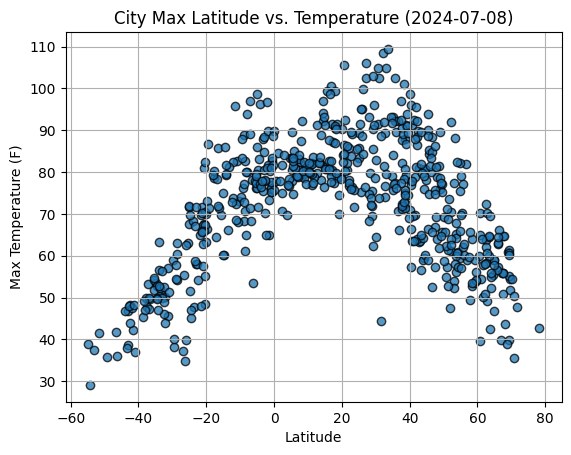

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker ='o', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Max Latitude vs. Temperature (2024-07-08)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

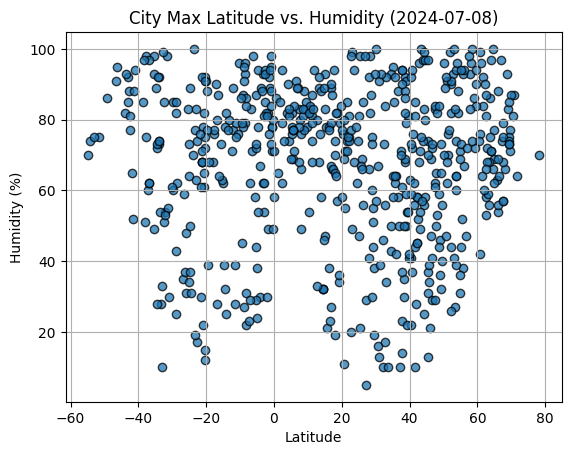

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker ='o', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2024-07-08)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

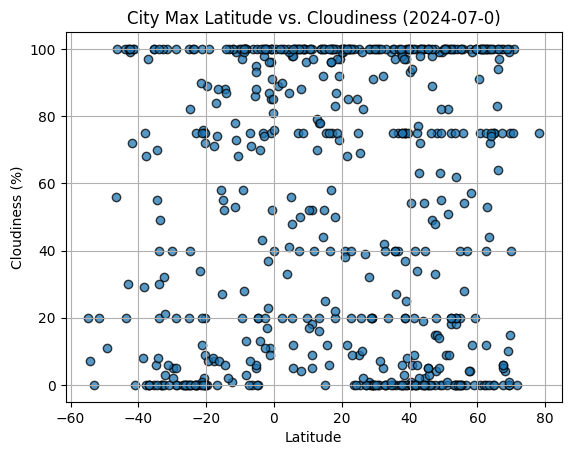

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker ='o', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2024-07-0)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

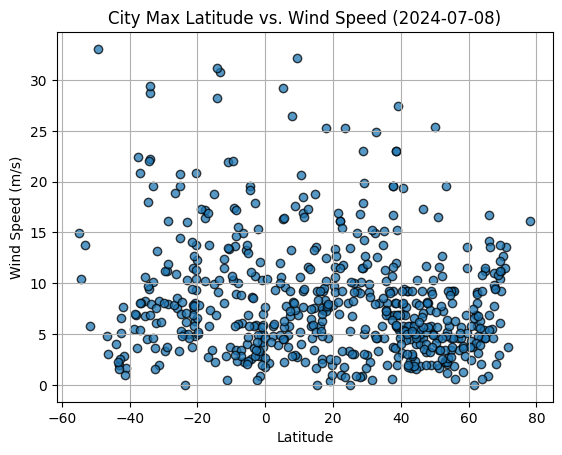

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker ='o', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2024-07-08)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [8]:
# Define a function to create Linear Regression plots
import scipy.stats as st
def linear_regression(x,y):
    print(f"The r-value is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_equation

def annotate(line_equation, a, b):
    plt.annotate(line_equation,(a,b), fontsize=15,color="red")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aral,40.5156,81.2636,77.92,41,1,19.42,CN,1720464836
8,ebon,4.5820,168.6964,83.39,74,41,10.60,MH,1720464848
9,val-d'or,48.1002,-77.7828,78.89,53,75,8.05,CA,1720464849
10,talnakh,69.4865,88.3972,54.48,77,15,11.23,RU,1720464697
11,craig,40.5153,-107.5464,76.95,22,0,5.75,US,1720464852


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,41.45,75,20,5.75,CL,1720464538
2,grytviken,-54.2811,-36.5092,29.12,74,7,10.45,GS,1720464839
3,adamstown,-25.0660,-130.1015,67.66,64,100,19.55,PN,1720464675
4,la punta,-33.1837,-66.3127,50.50,28,0,10.16,AR,1720464842
5,puerto ayora,-0.7393,-90.3518,76.96,95,96,5.01,EC,1720464706


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.63


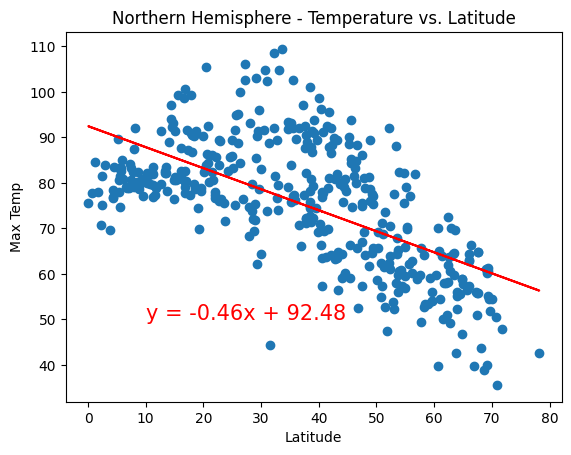

In [121]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Temperature vs. Latitude")
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(equation, 10, 50)

plt.show()

The r-value is : 0.84


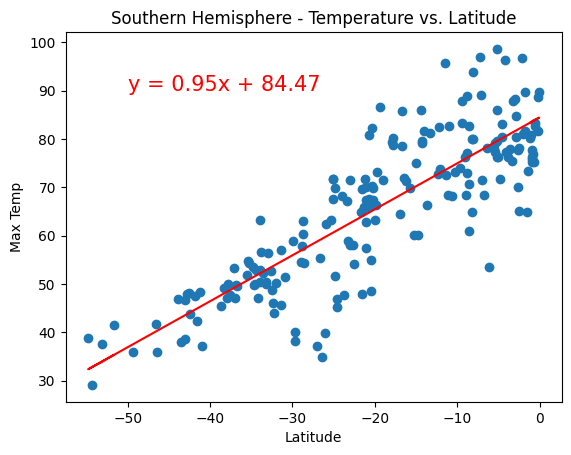

In [34]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Temperature vs. Latitude")
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(equation, -50, 90)

plt.show()

Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere- Temperature vs. Latitude")
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(equation, -10, 50)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Both Northern and Southern Hemiishperes have very strong correlations between Max temps and Latitude, with the Southern Hemisphere having the stronger correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : -0.0


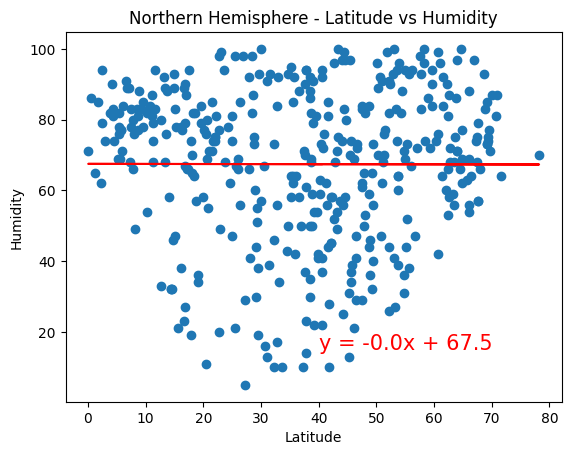

In [127]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Latitude vs Humidity")
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 40, 15)

plt.show()

The r-value is : -0.03


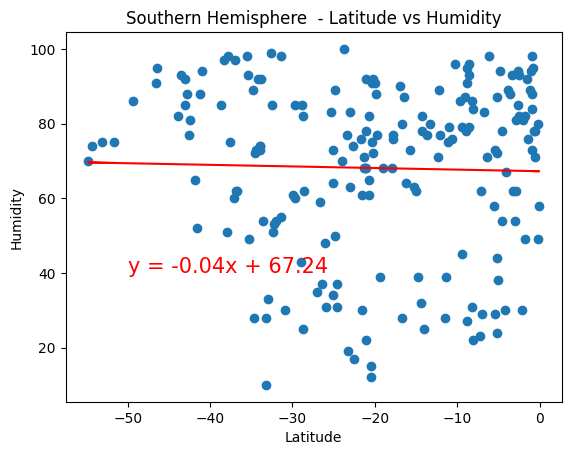

In [20]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere  - Latitude vs Humidity")
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, -50, 40)

plt.show()

**Discussion about the linear relationship:** There is essentially no linear realationship between humidity and latitude in either the Northern or Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : -0.15


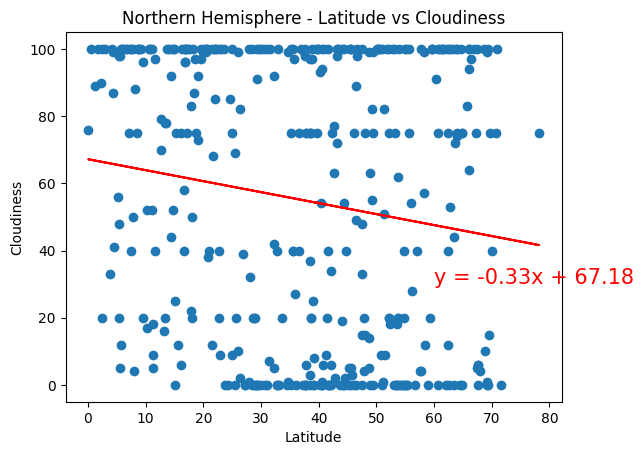

In [22]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 60, 30)

plt.show()

The r-value is : 0.24


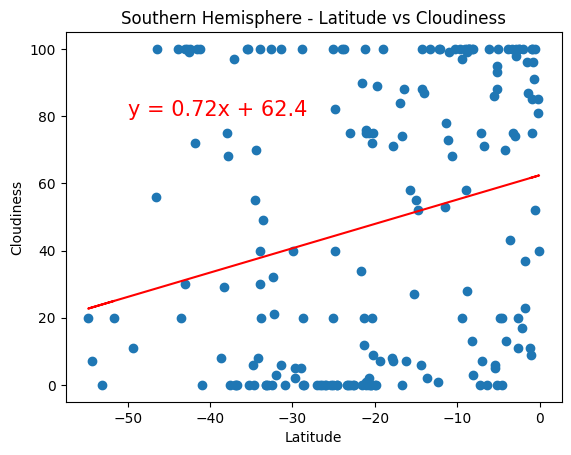

In [24]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, -50, 80)

plt.show()

**Discussion about the linear relationship:** there are weak correlations for both the Norhtern and Southern Hemispheres between cloudiness and lattitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : -0.14


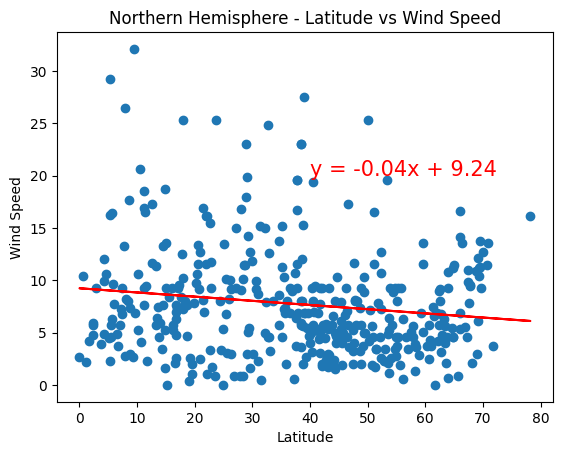

In [139]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 40, 20)

plt.show()

The r-value is : -0.08


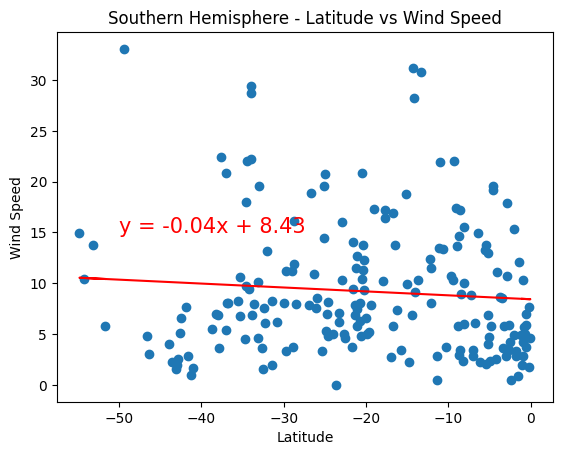

In [26]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Latitude vs Wind Speed")
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

    
# Add annotation to the best location
annotate(equation, -50, 15)
plt.show()

**Discussion about the linear relationship:** there are weak correlations for both the Norhtern and Southern Hemispheres between wind speed and lattitude